In [ ]:
# Clear namespace
for name in dir():
    if not name.startswith('_'):
        del globals()[name]

Import libraries

In [4]:
#Import libraries before starting
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import statsmodels.api as sm
from itertools import combinations
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from collections import Counter


In this problem, we will explore how to predict the underlying emotional tone of textual data 

We will be using the dataset in the file `dataset_2.txt`. In this dataset, there are 1382 posts containing textual opinions about Ford automobiles, along with labels indicating whether the opinion expressed is positive or negative. 

Given a new post about an automobile, our goal is to predict if the sentiment expressed in the new post is positive or negative. For this task you should implement a *regularized* logistic regression model.


## Functions (necessary for the following calculations)

In [169]:
import pandas as pd
import numpy as np

from textblob import TextBlob

#--------  extract_words

# A function to extract words from a corpus
# requires
#      re
# Input: 
#      corpus (corpus objec)

def extract_words(corpus):
    for i in corpus.sentences:
        z.append(i.sentiment)
        
#extract_words(blob)

#--------  count_words
# A function to count words
# requires:
#      pandas
#      collections
# Input: 
#      words (word array)
#      number_of_words (number of most common words for the output)
def count_words(data, column_name, number_of_words):
    words = []
    for text in data[column_name]:
        words.extend(text.split())

    common_words = Counter(words).most_common(number_of_words)
    return common_words

#--------  plot_common_words
# Plot histogram of the most common words
# requires:
#      matplotlib
# Input: 
#      common_words (array of the words to plot)

def plot_common_words(common_words):
    words = [word[0] for word in common_words]
    frequencies = [word[1] for word in common_words]
    
    plt.figure(figsize=(18, 10))
    plt.bar(range(len(words)), frequencies, color='darkblue', alpha=0.7, edgecolor='white')
    plt.xticks(range(len(words)), words, rotation=90)
    plt.title('Plot I: 100 most common words')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

# Example usage




## 1: Importing Data

**Solution:**

In [138]:
#Code here
data = pd.read_csv('/Users/hamed/Downloads/cs452_552_homework4/datasets/dataset_2.txt')
data['text'] = data['text'].str.replace('  ', '.')

In [197]:
data

,class,text,sentiment,CleanText
0,Neg,In 1992 we bought a new Taurus and we really ...,0.176515,bought new taurus really loved decided try new...
1,Neg,The last business trip.I drove to San Francis...,0.062408,last business trip drove san francisco went he...
2,Neg,My husband and I purchased a 1990 Ford F250 a...,-0.020166,husband purchased ford f nothing problems owne...
3,Neg,I feel I have a thorough opinion of this truc...,0.015283,feel thorough opinion truck compared post eval...
4,Neg,AS a mother of 3.all of whom are still in car...,0.072612,mother still carseats logical thing trade sx m...
...,...,...,...,...
1377,Pos,In June we bought the Sony Limited Edition Fo...,0.173477,june bought sony limited edition focus se dr s...
1378,Pos,After 140 000 miles.we decided to replace my ...,0.315385,miles decided replace wife toyota camry found ...
1379,Pos,The Ford Focus is a great little record setti...,0.243767,ford focus great little record setting car fir...
1380,Pos,I needed a new car because my hyundai excel 9...,0.176088,needed new car hyundai excel decided shop arou...


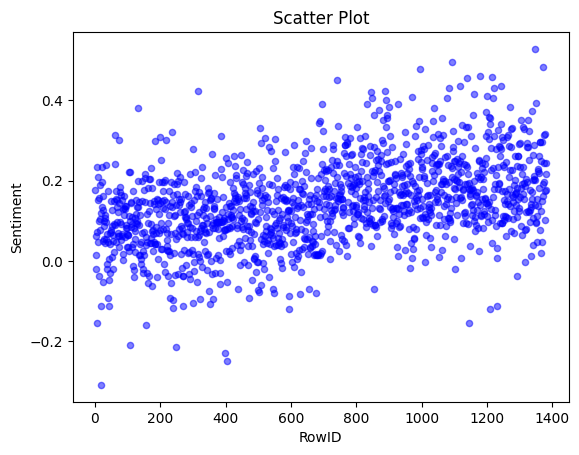

In [201]:
# Code here
z = []
for text in data['text']:
    blob = TextBlob(str(text))
    z.append(blob.sentiment.polarity)
data['sentiment'] = z
data['RowID'] = range(1, len(data) + 1)
data.plot.scatter(x='RowID',y='sentiment', color='blue', alpha=0.5)

# Set plot title and labels
plt.title('Scatter Plot')
plt.xlabel('RowID')
plt.ylabel('Sentiment')

# Display the plot
plt.show()



In [158]:
count_words(data,3)

[('the', 29849), ('a', 16156), ('to', 13956)]

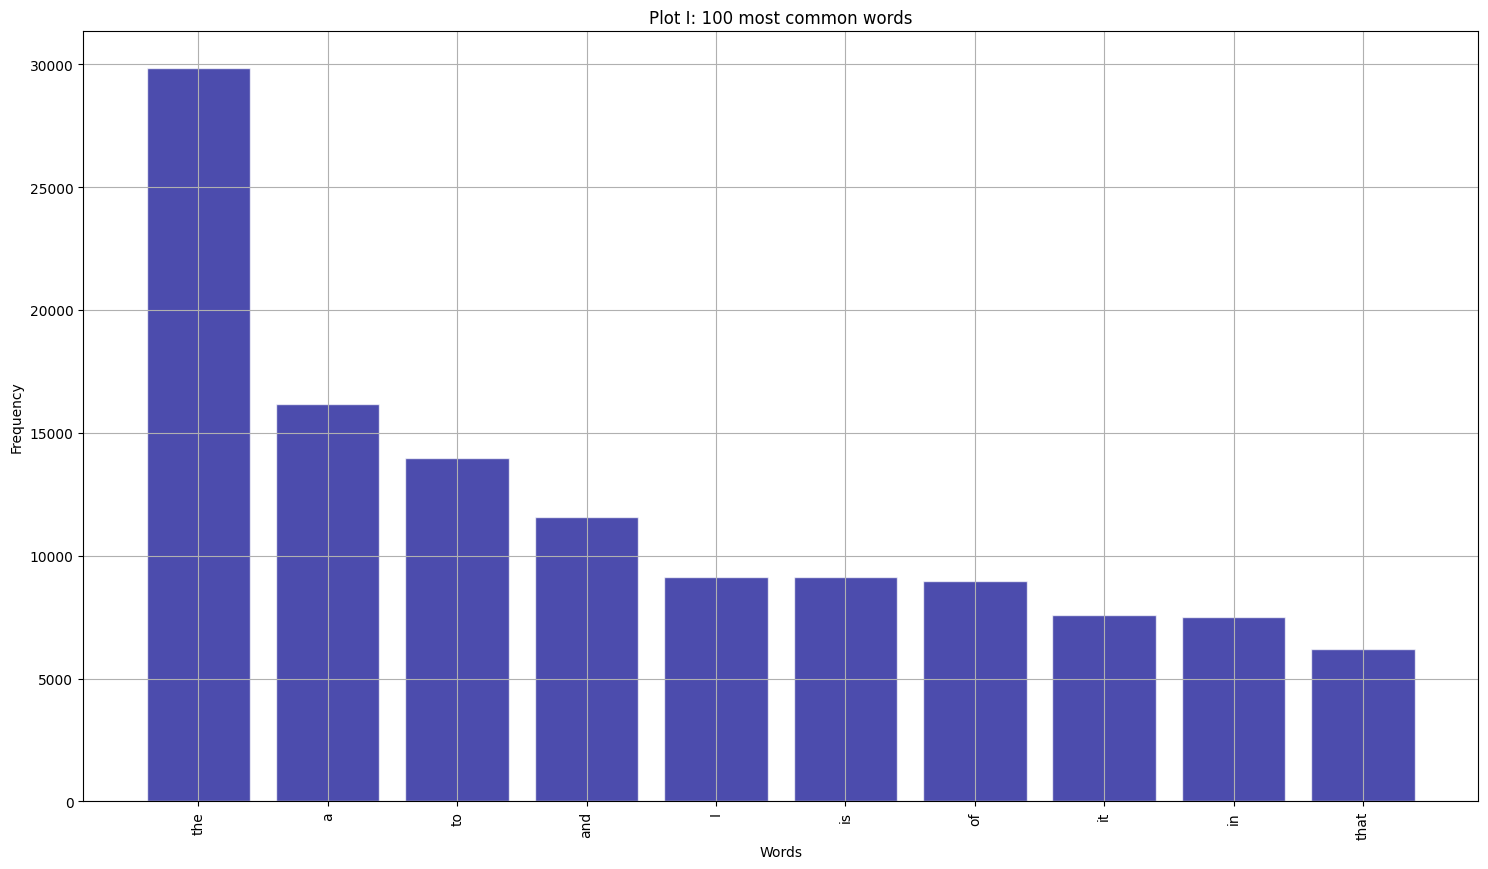

In [170]:
common_words = count_words(data,'text',10)
plot_common_words(common_words)

## 3: Cleaning the data

**Solution:**

In [172]:
#Code here
def clean_text(text):
    if isinstance(text, float):
        return ''
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

data['CleanText'] = data['text'].apply(clean_text)

print(data['CleanText'])

0       bought new taurus really loved decided try new...
1       last business trip drove san francisco went he...
2       husband purchased ford f nothing problems owne...
3       feel thorough opinion truck compared post eval...
4       mother still carseats logical thing trade sx m...
                              ...                        
1377    june bought sony limited edition focus se dr s...
1378    miles decided replace wife toyota camry found ...
1379    ford focus great little record setting car fir...
1380    needed new car hyundai excel decided shop arou...
1381    ford focus se door sedan spacious interior sol...
Name: CleanText, Length: 1382, dtype: object


## 4.  Modelling

**Solution:**

In [185]:
#Code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
model = LogisticRegression(penalty='l2', C=2.0, max_iter=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


## 5. Analysis

**Solution:**

In [186]:
#Code here
classification_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report)

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        51
         1.0       1.00      1.00      1.00        60
         3.0       1.00      1.00      1.00        52

    accuracy                           1.00       163
   macro avg       1.00      1.00      1.00       163
weighted avg       1.00      1.00      1.00       163



## 6. Visualisation

**Solution:**

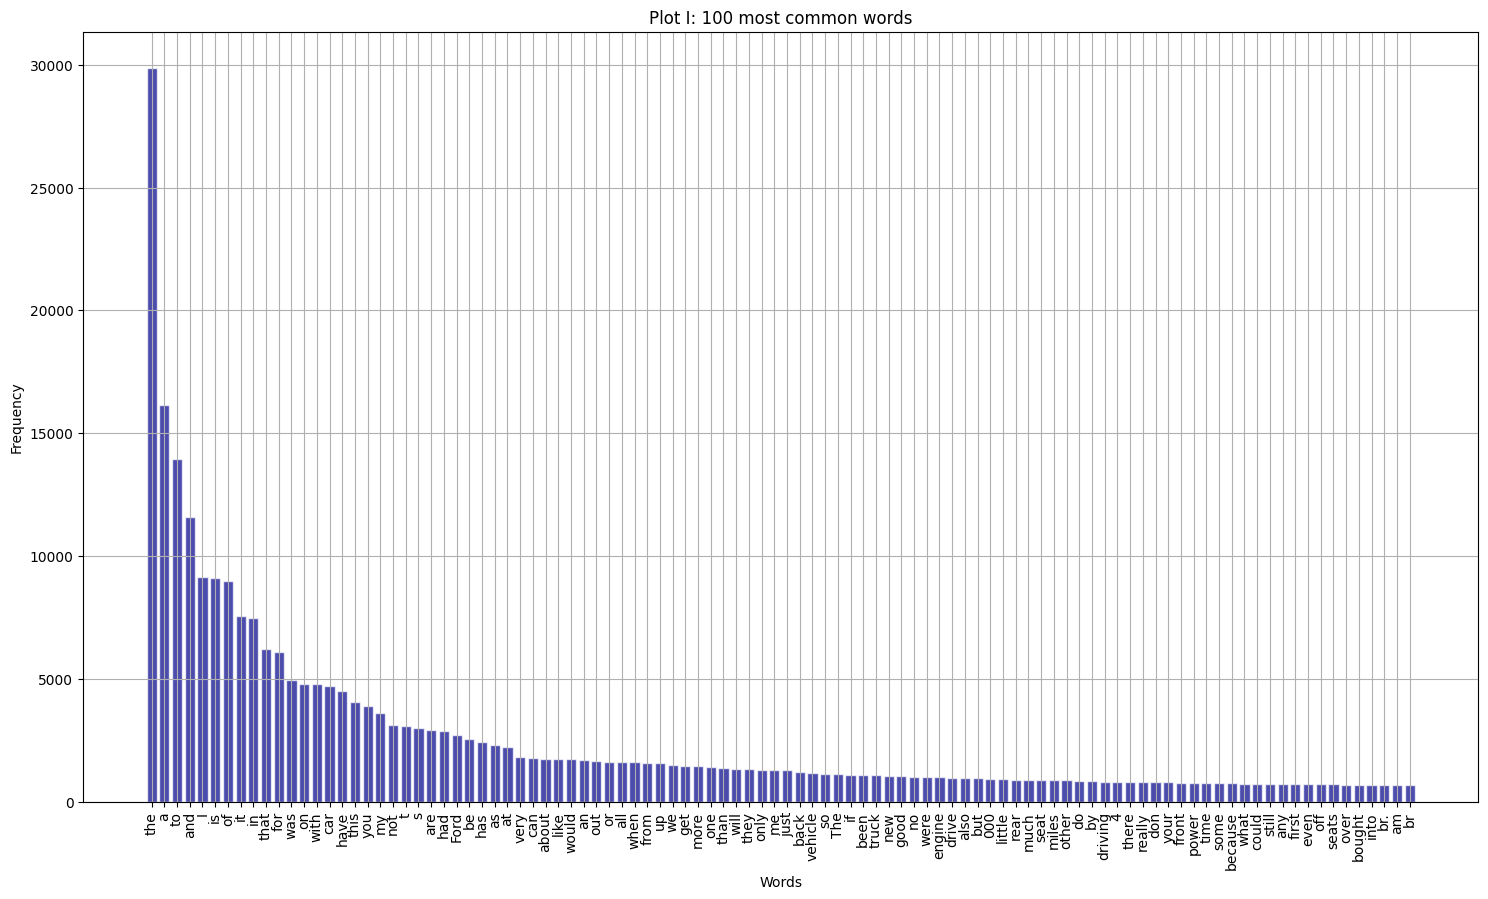

In [189]:
#Code here
words = extract_words(blob)
common_words = count_words(data,'text', 100)
plot_common_words(common_words)